In [1]:
import os
os.chdir(r'C:\Users\Sai krishna\Documents\basic_python\Comcast')

Importing the req libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
data = pd.read_csv('Comcast_telecom_complaints_data.csv')

In [4]:
data.head(5)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
data['Date'] = data['Date'].apply(lambda x : dt.date(int('20'+x[6:8]),int(x[3:5]),int(x[0:2])))

In [6]:
data = data.sort_values('Date')

In [7]:
ary = data.groupby('Date').size()

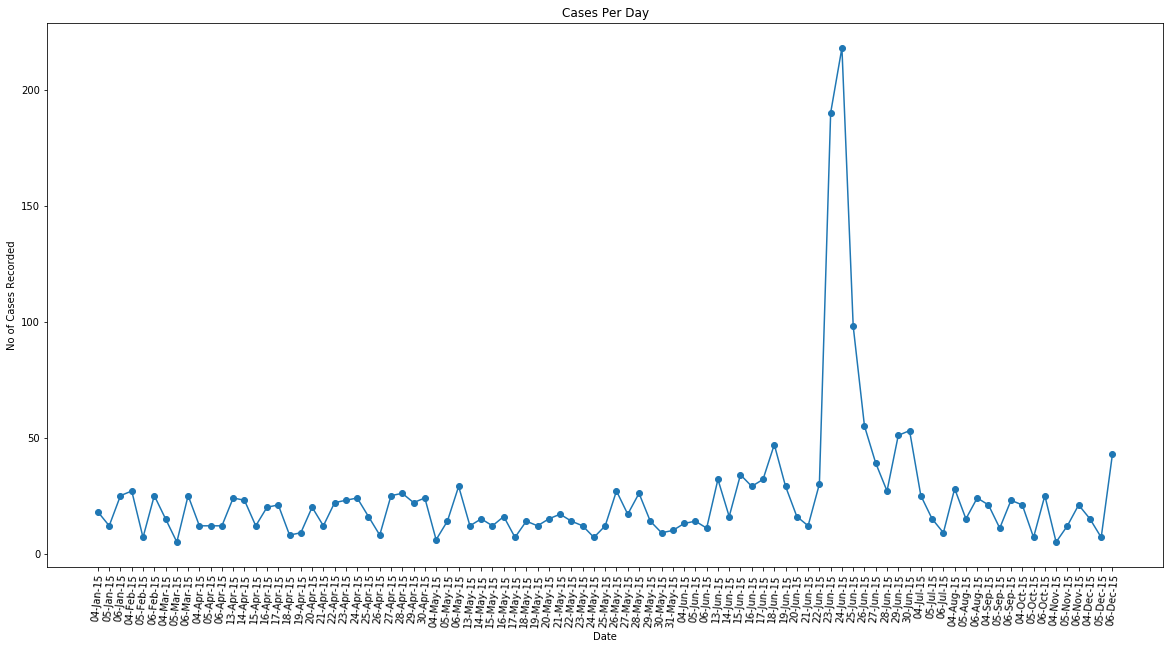

In [8]:
plt.figure(figsize = [20,10])
plt.xticks(rotation = 85)
plt.plot(data['Date_month_year'].unique(),np.array(ary),marker='o')
plt.xlabel('Date');
plt.ylabel('No of Cases Recorded');
plt.title('Cases Per Day');

In [9]:
sm=np.zeros(12)
ind = ary.index
for i in ind:
    k = i.month-1 
    sm[k] = sm[k] + ary[i] 

Text(0.5, 1.0, 'Cases Per Month')

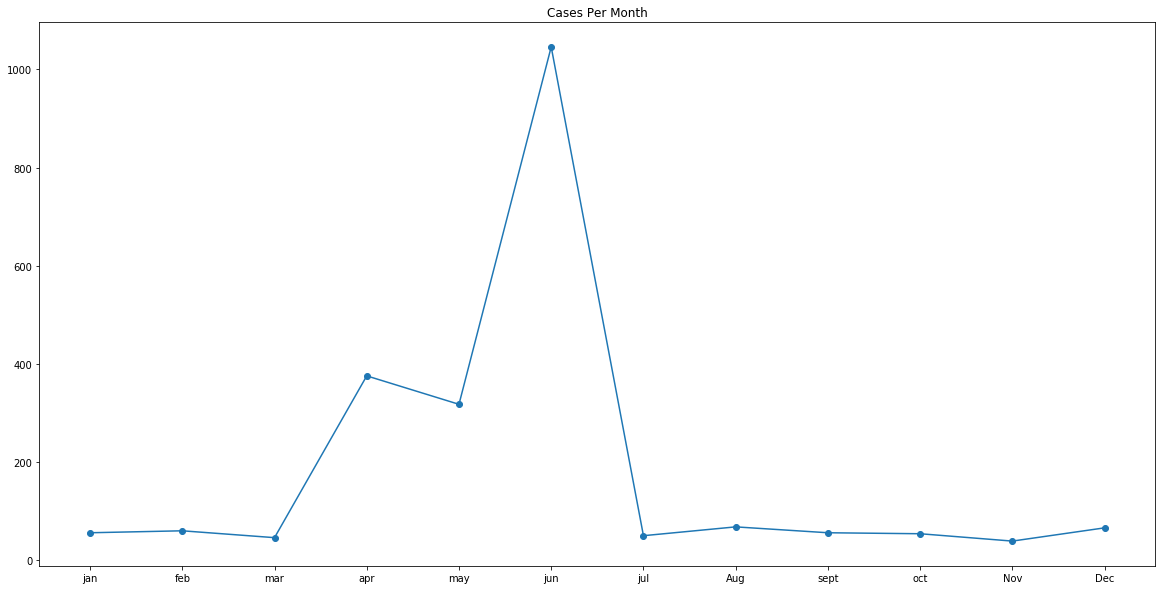

In [10]:
plt.figure(figsize=(20,10))
x =['jan','feb','mar','apr','may','jun','jul','Aug','sept','oct','Nov','Dec']
plt.plot(x,sm,marker = 'o')
plt.title('Cases Per Month')

In [11]:
comp = data['Customer Complaint'].str.lower().value_counts()[0:20]
temp = comp[0:70]*100/comp.sum()
temp = temp.cumsum()

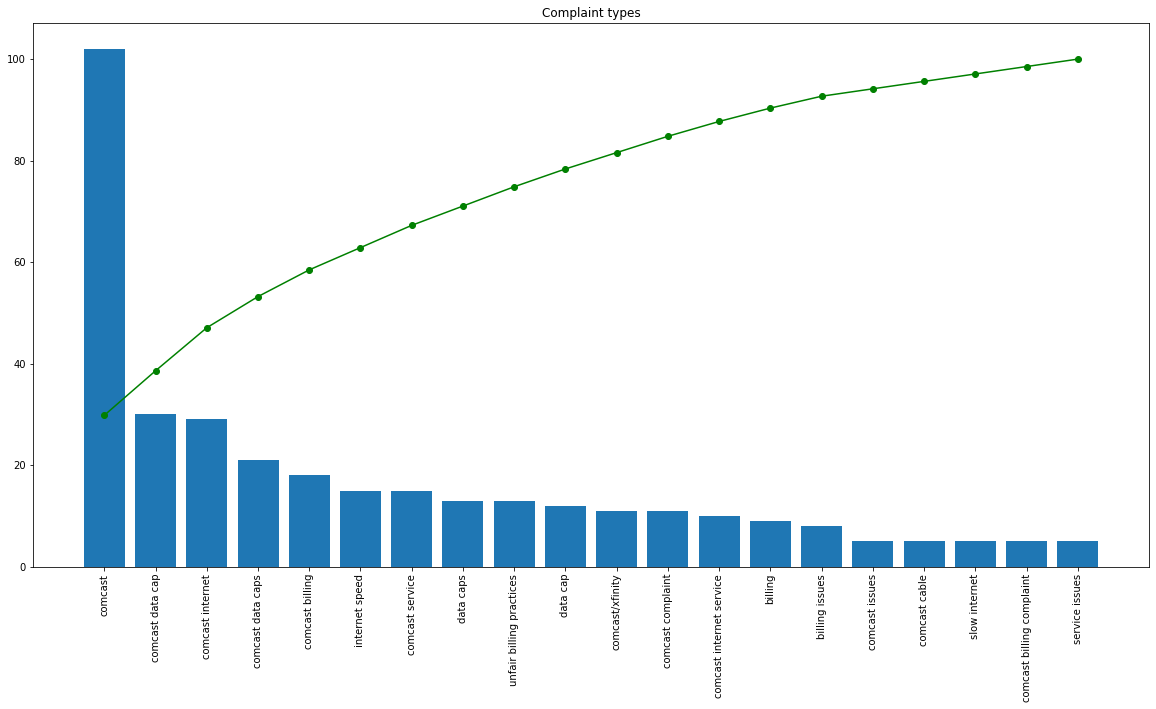

In [12]:
plt.figure(figsize = (20,10))
plt.bar(comp.index , comp)
plt.plot(temp,marker = 'o',color = 'green')
plt.xticks(rotation = 90);
plt.title("Complaint types");

Max complains are regarding the comcast 

In [13]:
grp = data.groupby('Received Via')

In [14]:
max_complaintes_internet = grp.get_group('Internet')['Customer Complaint'].value_counts().head(1)
max_complaines_customer_care = grp.get_group('Customer Care Call')['Customer Complaint'].value_counts().head(1)
print(max_complaines_customer_care)
print(max_complaintes_internet)

Comcast    42
Name: Customer Complaint, dtype: int64
Comcast    41
Name: Customer Complaint, dtype: int64


In [15]:
def upd(x):
    if x == 'Solved':
        return('Closed')
    elif x == 'Pending':
        return('Open')
    else:
        return(x)
data['new colum'] = data['Status'].apply(upd)

In [16]:
data.tail()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,new colum
34,337489,Comcast not refunding my credit,2015-12-06,06-Dec-15,3:59:57 PM,Internet,Alpharetta,Georgia,30005,Solved,No,Closed
1063,336690,Comcast Data Caps,2015-12-06,06-Dec-15,11:52:00 AM,Customer Care Call,Knoxville,Tennessee,37919,Solved,No,Closed
465,336234,Unresolved Issues,2015-12-06,06-Dec-15,7:59:56 AM,Customer Care Call,Colorado Springs,Colorado,80909,Closed,No,Closed
1845,336532,Billing & Customer Service Issues,2015-12-06,06-Dec-15,11:17:31 AM,Internet,Savannah,Georgia,31406,Solved,No,Closed
2076,336982,Comcast monopoly,2015-12-06,06-Dec-15,1:18:20 PM,Internet,Tukwila,Washington,98188,Solved,No,Closed


In [17]:
data['State'] = data['State'].str.lower()

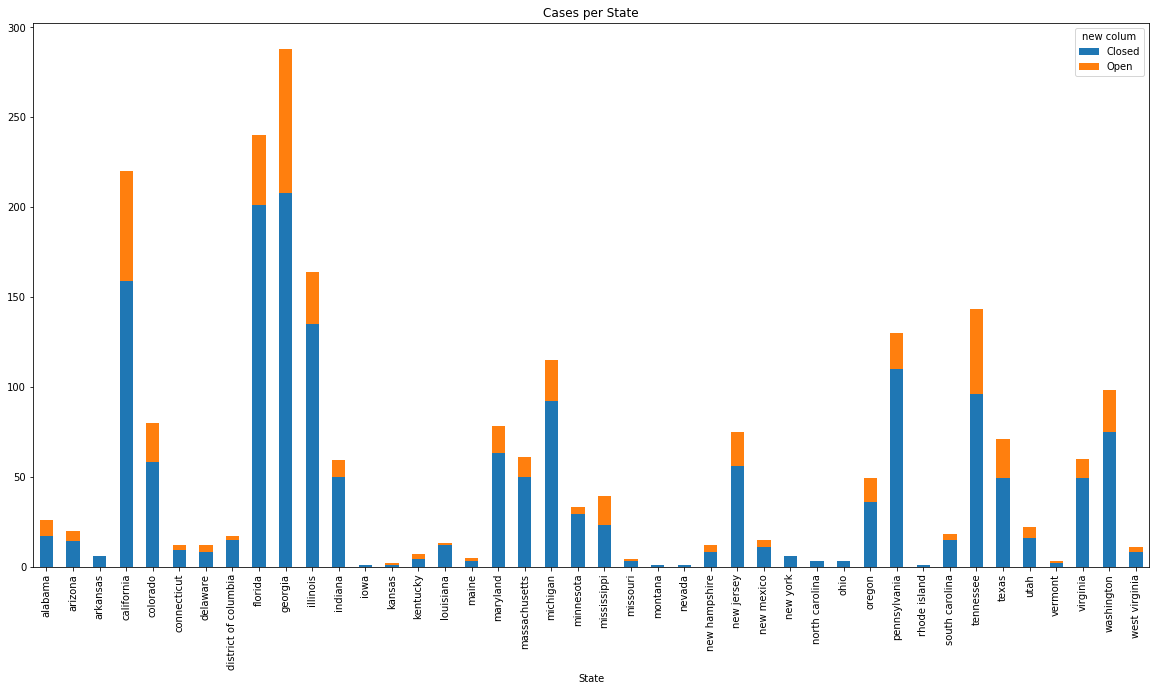

In [18]:
data.groupby(['State','new colum']).size().unstack().plot.bar(figsize = (20,10),stacked = True);
plt.title('Cases per State');

## Both Maximum number of complaints and unresovled complaints are in Georgia

In [19]:
temp = data.groupby(['State','new colum']).size().unstack()
temp.fillna(0,inplace =True)
temp['new'] = temp['Open']*100 / (temp['Open'] + temp['Closed'])
print("Top 5 countries with ")
print(temp.sort_values('new',ascending=False).iloc[0:5,-1])

Top 5 countries with 
State
kansas         50.000000
kentucky       42.857143
mississippi    41.025641
maine          40.000000
alabama        34.615385
Name: new, dtype: float64


State with Highest unresolved cases is Kansas with 50%

In [20]:
temp = data.groupby(['Received Via','new colum']).size().unstack()
temp['Percentage of Cases Resolved'] = temp ['Closed']*100 / (temp['Open'] + temp['Closed'])
print(temp)

new colum           Closed  Open  Percentage of Cases Resolved
Received Via                                                  
Customer Care Call     864   255                     77.211796
Internet               843   262                     76.289593
